### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Configure plot styles 

In [3]:

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) 
plt.rcParams['font.size'] = 12

### Load the dataset

In [4]:
try:
    df = pd.read_csv('../data/raw/data.csv')
    print("Successfully loaded 'data.csv'")
except FileNotFoundError:
    print("File not found. Please ensure 'data.csv' is in 'data/' relative to your project root.")

if df is not None:
    print("\n--- Data Overview ---")
    print(f"Shape of the dataset: {df.shape[0]} rows, {df.shape[1]} columns")

    print("\nFirst 5 rows of the dataset:")
    display(df.head()) 

    print("\nConcise summary of the DataFrame (data types, non-null values):")
    df.info()

Successfully loaded 'data.csv'

--- Data Overview ---
Shape of the dataset: 95662 rows, 16 columns

First 5 rows of the dataset:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



Concise summary of the DataFrame (data types, non-null values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  Prici

- summary statistics

In [5]:
if df is not None:
    print("\n--- Descriptive statistics for numerical columns ---")
    display(df.describe())

    print("\n--- Descriptive statistics for categorical columns ---")
    display(df.describe(include='object'))


--- Descriptive statistics for numerical columns ---


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000



--- Descriptive statistics for categorical columns ---


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


- Distribution of numerical Features

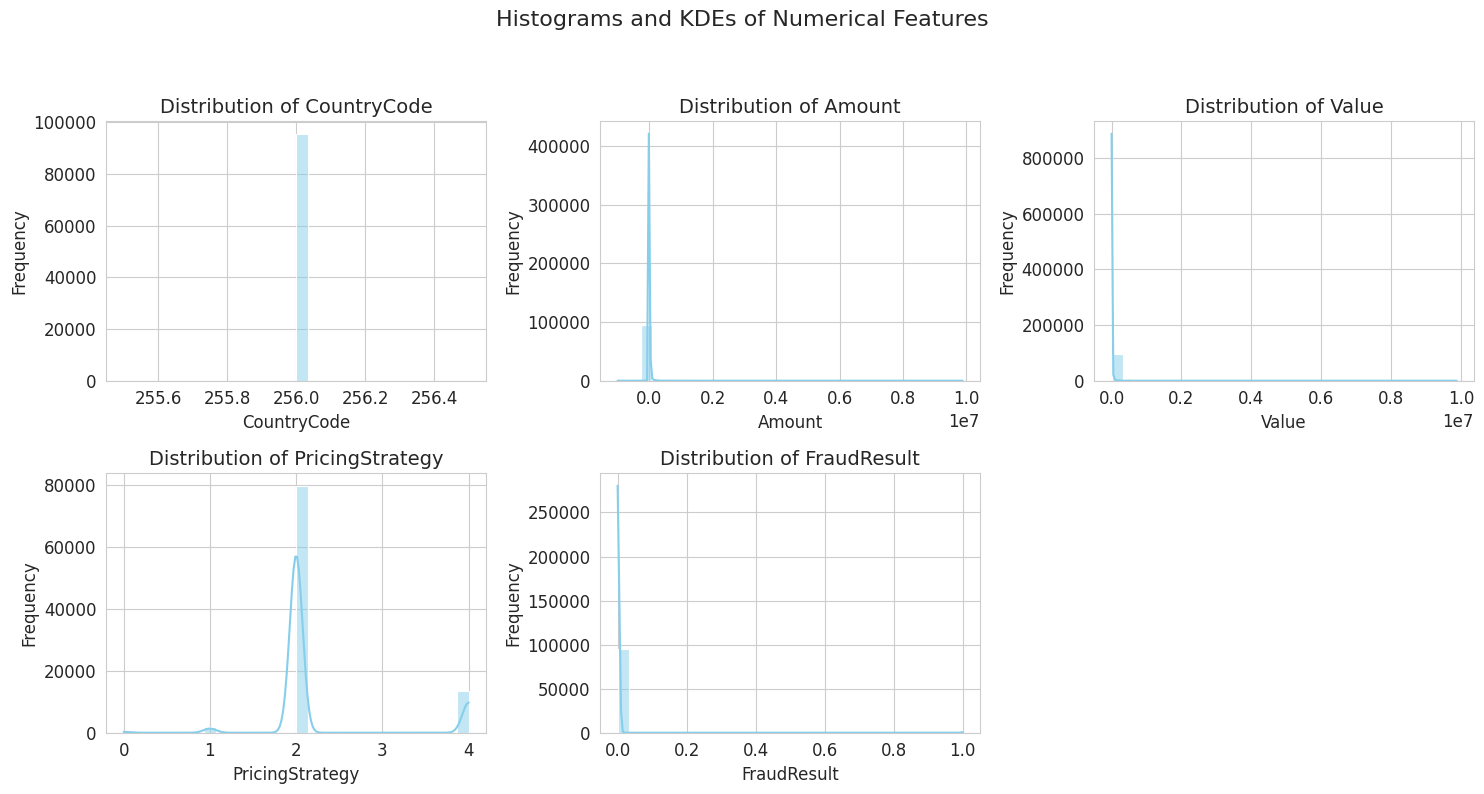

In [6]:
if df is not None:
    numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

    if not numerical_columns:
        print("No numerical columns found to plot distributions.")
    else:
        num_plots = len(numerical_columns)
        num_cols = 3
        num_rows = (num_plots + num_cols - 1) // num_cols

        plt.figure(figsize=(num_cols * 5, num_rows * 4))
        plt.suptitle('Histograms and KDEs of Numerical Features', y=1.02, fontsize=16)

        for i, col in enumerate(numerical_columns):
            plt.subplot(num_rows, num_cols, i + 1)
            sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
            plt.title(f'Distribution of {col}', fontsize=14)
            plt.xlabel(col, fontsize=12)
            plt.ylabel('Frequency', fontsize=12)
            plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout

        plt.show()

- Distribution of categorical features

In [ ]:
if df is not None:
    categorical_columns = df.select_dtypes(include='object').columns.tolist()

    if not categorical_columns:
        print("No categorical columns found to plot distributions.")
    else:
        num_plots_cat = len(categorical_columns)
        num_cols_cat = 2
        num_rows_cat = (num_plots_cat + num_cols_cat - 1) // num_cols_cat

        plt.figure(figsize=(num_cols_cat * 6, num_rows_cat * 5))
        plt.suptitle('Bar Plots of Categorical Features', y=1.02, fontsize=16)

        for i, col in enumerate(categorical_columns):
            plt.subplot(num_rows_cat, num_cols_cat, i + 1)
            sns.countplot(
                data=df,
                x=col,
                hue=col,            # set x as hue to avoid warning
                palette='viridis',
                order=df[col].value_counts().index,
                legend=False        # hide duplicate legend
            )
            plt.title(f'Distribution of {col}', fontsize=14)
            plt.xlabel(col, fontsize=12)
            plt.ylabel('Count', fontsize=12)
            plt.xticks(rotation=45, ha='right', fontsize=10)
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

- Correlation Analysis


--- Correlation Matrix of Numerical Features ---


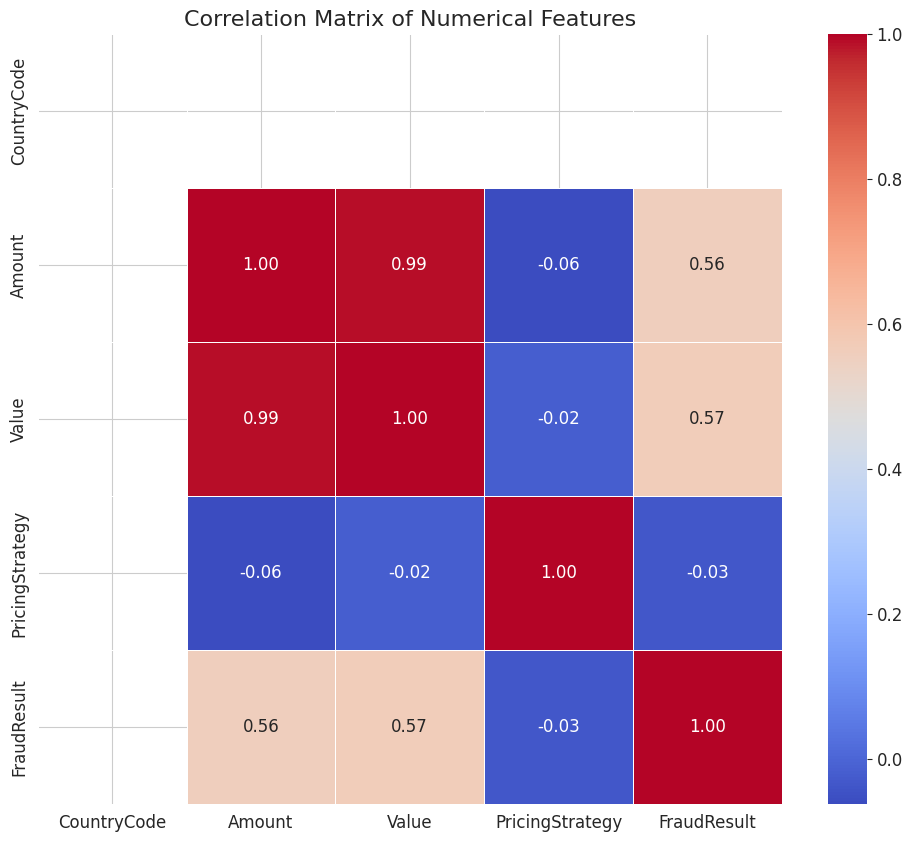

In [7]:
if df is not None:
    print("\n--- Correlation Matrix of Numerical Features ---")
    numerical_columns_for_corr = df.select_dtypes(include=np.number).columns.tolist()

    if not numerical_columns_for_corr or len(numerical_columns_for_corr) < 2:
        print("Not enough numerical columns to perform correlation analysis.")
    else:
        correlation_matrix = df[numerical_columns_for_corr].corr()

        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
        plt.title('Correlation Matrix of Numerical Features', fontsize=16)
        plt.show()

- Identifying Missing Values

In [8]:
if df is not None:
    print("\n--- Missing Values Analysis ---")
    missing_values = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    
    missing_df = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

    if missing_df.empty:
        print("No missing values found in the dataset.")
    else:
        display(missing_df)

        plt.figure(figsize=(12, 6))
        sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
        plt.title('Heatmap of Missing Values', fontsize=16)
        plt.show()


--- Missing Values Analysis ---
No missing values found in the dataset.


- Outlier Detection


--- Outlier Detection (using Box Plots) ---


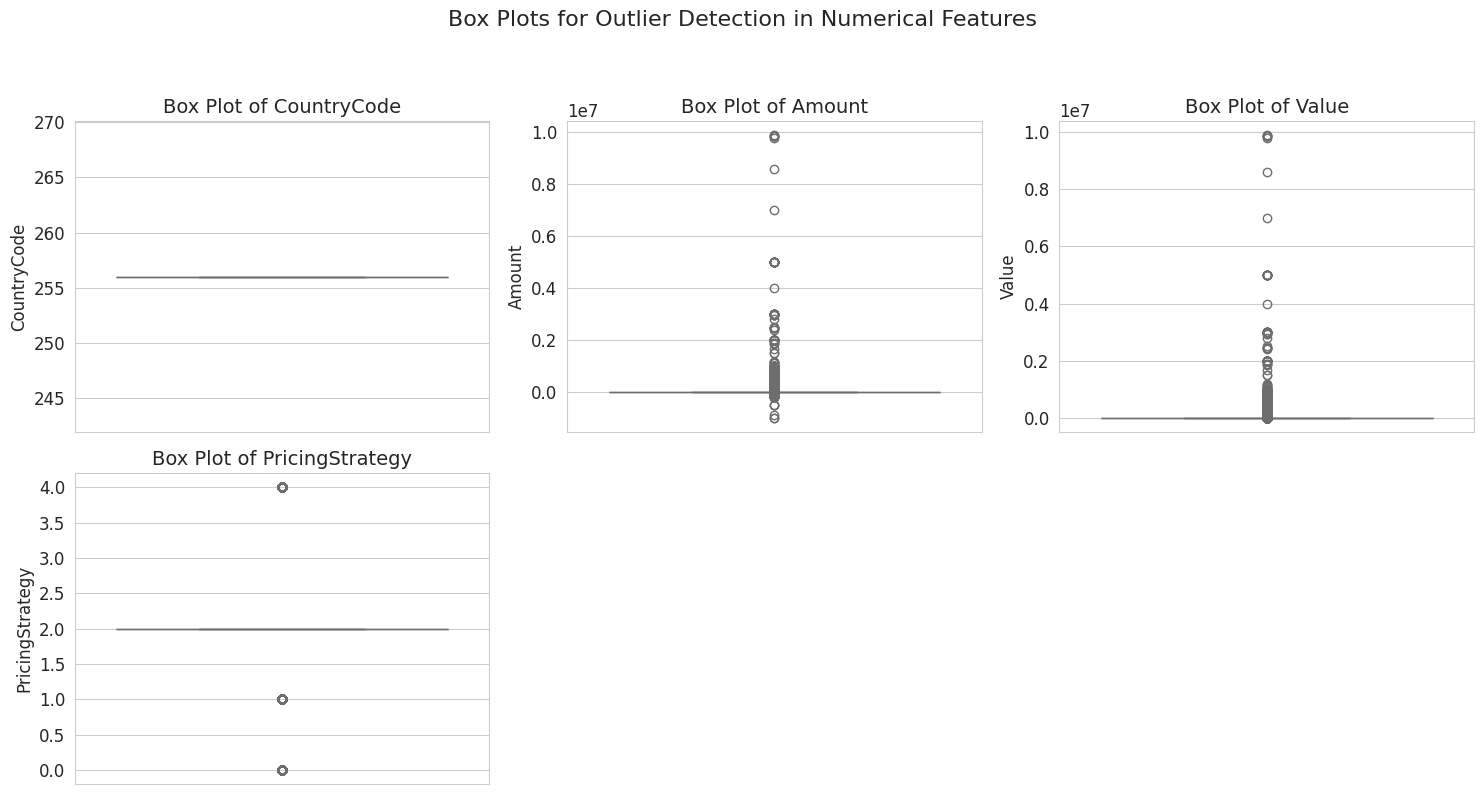

In [9]:
if df is not None:
    print("\n--- Outlier Detection (using Box Plots) ---")
    
    numerical_columns_for_outliers = df.select_dtypes(include=np.number).columns.tolist()
    plot_columns_for_outliers = [col for col in numerical_columns_for_outliers if col not in ['FraudResult']]


    if not plot_columns_for_outliers:
        print("No suitable numerical columns found for box plot visualization after filtering.")
    else:
        num_plots_outlier = len(plot_columns_for_outliers)
        num_cols_outlier = 3
        num_rows_outlier = (num_plots_outlier + num_cols_outlier - 1) // num_cols_outlier

        plt.figure(figsize=(num_cols_outlier * 5, num_rows_outlier * 4))
        plt.suptitle('Box Plots for Outlier Detection in Numerical Features', y=1.02, fontsize=16)

        for i, col in enumerate(plot_columns_for_outliers):
            plt.subplot(num_rows_outlier, num_cols_outlier, i + 1)
            sns.boxplot(y=df[col], color='lightcoral') 
            plt.title(f'Box Plot of {col}', fontsize=14)
            plt.ylabel(col, fontsize=12)
            plt.tight_layout(rect=[0, 0.03, 1, 0.98])

        plt.show()  

- Handle Outliers


Shape of DataFrame AFTER outlier capping (IQR method): (95662, 16)

Descriptive statistics for 'Amount' after capping:
count    95662.000000
mean      1449.051201
std       3210.808287
min      -4325.000000
25%        -50.000000
50%       1000.000000
75%       2800.000000
max       7075.000000
Name: Amount, dtype: float64


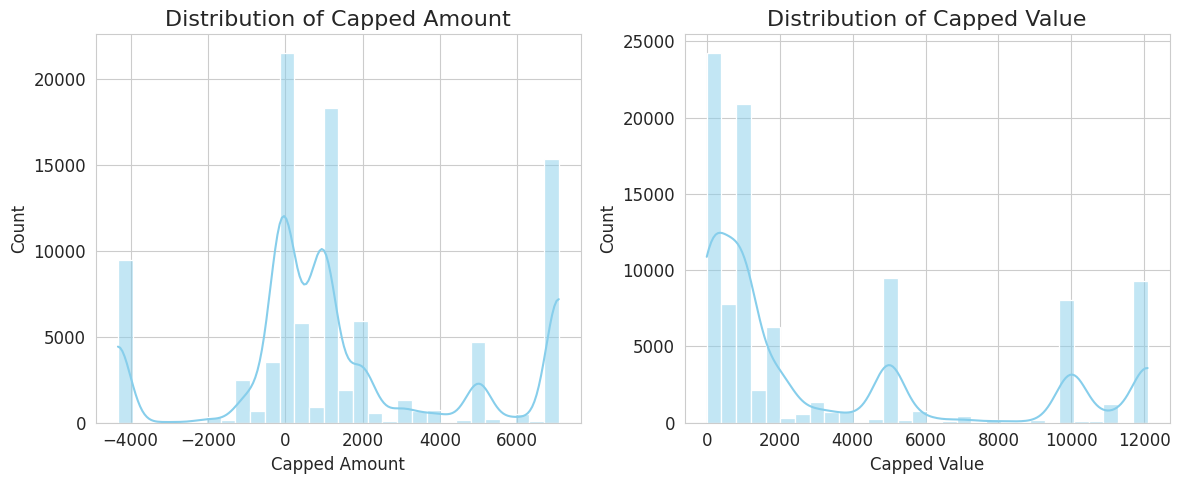

In [19]:
# identify numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

# Filter fraud results and country code (constant)
numerical_features_for_outliers = [col for col in numerical_columns if col not in ['FraudResult', 'CountryCode']] 

# Capping Outliers (Winsorization) 
# This is often a better approach for financial data where extreme values might be real.
df_capped = df.copy()

for col in numerical_features_for_outliers:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])

print(f"\nShape of DataFrame AFTER outlier capping (IQR method): {df_capped.shape}")
print("\nDescriptive statistics for 'Amount' after capping:")
print(df_capped['Amount'].describe())

df = df_capped

# Plot the distributions of the CAPPED values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_capped['Amount'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Capped Amount', fontsize=16)
plt.xlabel('Capped Amount', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(df_capped['Value'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Capped Value', fontsize=16)
plt.xlabel('Capped Value', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


- Save data

In [20]:
# Assuming df_capped is your DataFrame after capping outliers
output_path = '../data/processed/data_capped.csv' # Define a path for your processed data
df_capped.to_csv(output_path, index=False) # index=False prevents writing the DataFrame index as a column
print(f"DataFrame with capped outliers saved to: {output_path}")

DataFrame with capped outliers saved to: ../data/processed/data_capped.csv
